## Penalized Linear Model
_______________________________________________________________________

The target variable we are trying to predict is the self reported anxiety score, on a scale of 1-10. Therefore, we need a penalized linear regression model. In this notebook, we will explore Ridge, Lasso, and Elastic Net regression, and optimize and train each model.

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [111]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

**Ridge Regression**

Ridge regression is a linear model that adds L2 regularization to the ordinary least squares (OLS) loss function.
- The L2 penalty shrinks the coefficients towards zero
- Helps to reduce overfitting, especially when features are correlated (multicollinearity)
- Controlled by the hyperparameter alpha: higher values increase the amount of shrinkage

In [112]:
# Ridge

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()), # standard scaler in pipeline
    ('ridge', Ridge(random_state=123)) # specifying ridge in our pipeline
])

alphas = np.logspace(-4, 4, 100) # alphas, 100 values that are evenly spaced from 10^-4 to 10^4

ridge_params = {
    "ridge__alpha": alphas # defining parameters
}

# using gridsearchcv to avoid data leakage
ridge_grid = GridSearchCV(
    ridge_pipeline,
    ridge_params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_["ridge__alpha"])
print("Best Ridge CV MSE:", -ridge_grid.best_score_)
print("Best Ridge CV R²:", r2_score(y_train, ridge_grid.predict(X_train)))
print("Best Ridge CV RMSE:", np.sqrt(mean_squared_error(y_train, ridge_grid.predict(X_train))))

# evaluating the final model performance (on train set)

best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_train)

print("Ridge Final Evaluation (on best parameters):")
print("MSE:", mean_squared_error(y_train, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, ridge_pred)))
print("R²:", r2_score(y_train, ridge_pred))

Best Ridge alpha: 1555.6761439304755
Best Ridge CV MSE: 7.636304383026785
Best Ridge CV R²: 0.04782513605594463
Best Ridge CV RMSE: 2.7082673732300817
Ridge Final Evaluation (on best parameters):
MSE: 7.334712164902568
RMSE: 2.7082673732300817
R²: 0.04782513605594463


**LASSO Regression**

Lasso regression is a linear model with L1 regularization
- The L1 penalty can shrink come coefficients exactly to zero, so it can accomplish feature selection
- Also controlled by the hyperparameter alpha: higher values increase the sparsity of coefficients because more coefficients are reduced to zero

In [113]:
# Lasso

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()), #standard scaler
    ('lasso', Lasso(random_state=123)) # specifying to use LASSO
])

alphas = np.logspace(-4, 4, 100) # alphas, 100 values that are evenly spaced from 10^-4 to 10^4

lasso_params = {
    "lasso__alpha": alphas # defining the lasso parameters we defined above
}

# using gridsearchcv to test all the combinations on different folds of the data
lasso_grid = GridSearchCV(
    lasso_pipeline,
    lasso_params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_["lasso__alpha"])
print("Best Lasso CV MSE:", -lasso_grid.best_score_)
print("Best Lasso CV R²:", r2_score(y_train, lasso_grid.predict(X_train)))
print("Best Lasso CV RMSE:", np.sqrt(mean_squared_error(y_train, lasso_grid.predict(X_train))))

# evaluating the final model performance (on train set)

best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_train)

print("Lasso Final Evaluation (on best parameters):")
print("MSE:", mean_squared_error(y_train, lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, lasso_pred)))
print("R²:", r2_score(y_train, lasso_pred))

Best Lasso alpha: 0.20565123083486536
Best Lasso CV MSE: 7.4906218377599245
Best Lasso CV R²: 0.04814571245257726
Best Lasso CV RMSE: 2.7078114277323895
Lasso Final Evaluation (on best parameters):
MSE: 7.33224272815812
RMSE: 2.7078114277323895
R²: 0.04814571245257726


**ElasticNet Regression**

ElasticNet combines both L1 and L2 penalties (combination of both Ridge and Lasso)
- this is useful when there are multiple correlated features and some feature selection is desired
- controlled by two hyperparameters:
  * alpha - overall strength of regularization
  * L1 ratio: balance between L1 and L2 penalties (0 = pure ridge and 1 = pure Lasso)
- allows flexibility to get benefits of both Ridge (stability with correlated features) and Lasso (sparce feature selection)

In [114]:
# Elastic Net

elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()), # standard scaler inside the pipeline
    ('elastic', ElasticNet(random_state=123)) # specifying elastic net
])

elastic_params = {
    "elastic__alpha": np.logspace(-4, 1, 50), # alphas
    "elastic__l1_ratio": np.linspace(0.1, 0.9, 9) # l1 ratio
}

# using GridsearchCV with our parameters to find the best combination of params
elastic_grid = GridSearchCV(
    elastic_pipeline,
    elastic_params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

elastic_grid.fit(X_train, y_train)

print("Best ElasticNet params:", elastic_grid.best_params_)
print("Best ElasticNet CV MSE:", -elastic_grid.best_score_)
print("Best ElasticNet CV R²:", r2_score(y_train, elastic_grid.predict(X_train)))
print("Best ElasticNet CV RMSE:", np.sqrt(mean_squared_error(y_train, elastic_grid.predict(X_train))))

# evaluating final model performance (on training set)

best_elastic = elastic_grid.best_estimator_
elastic_pred = best_elastic.predict(X_train)

print("ElasticNet Final Evaluation (on best parameters):")
print("MSE:", mean_squared_error(y_train, elastic_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, elastic_pred)))
print("R²:", r2_score(y_train, elastic_pred))

Best ElasticNet params: {'elastic__alpha': np.float64(0.2329951810515372), 'elastic__l1_ratio': np.float64(0.9)}
Best ElasticNet CV MSE: 7.490733762914656
Best ElasticNet CV R²: 0.047122959326868274
Best ElasticNet CV RMSE: 2.7092657885055798
ElasticNet Final Evaluation (on best parameters):
MSE: 7.34012111276676
RMSE: 2.7092657885055798
R²: 0.047122959326868274


**Some Visualizations:**

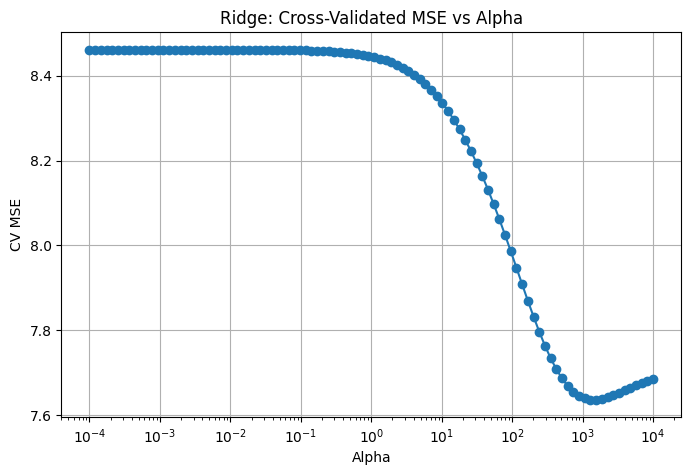

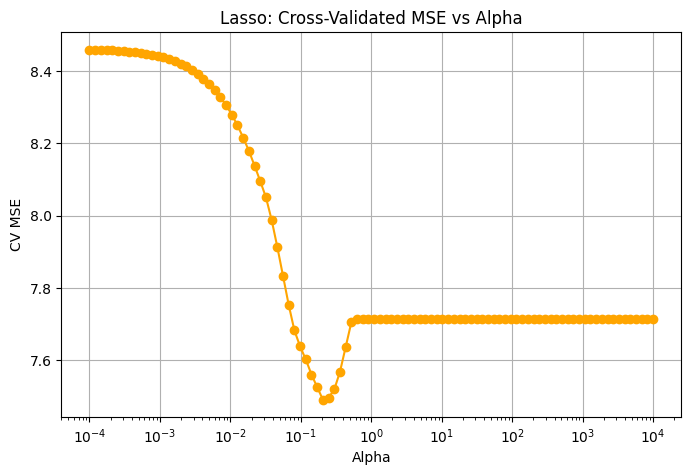

In [115]:
# The optimal alpha is where MSE is lowest
# We can visually see how sensitive the models are to regularization
import matplotlib.pyplot as plt

# Ridge
ridge_mse = -ridge_grid.cv_results_['mean_test_score']
ridge_alphas = ridge_grid.param_grid['ridge__alpha']

plt.figure(figsize=(8,5))
plt.plot(ridge_alphas, ridge_mse, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV MSE')
plt.title('Ridge: Cross-Validated MSE vs Alpha')
plt.grid(True)
plt.show()

# Lasso
lasso_mse = -lasso_grid.cv_results_['mean_test_score']
lasso_alphas = lasso_grid.param_grid['lasso__alpha']

plt.figure(figsize=(8,5))
plt.plot(lasso_alphas, lasso_mse, marker='o', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('CV MSE')
plt.title('Lasso: Cross-Validated MSE vs Alpha')
plt.grid(True)
plt.show()

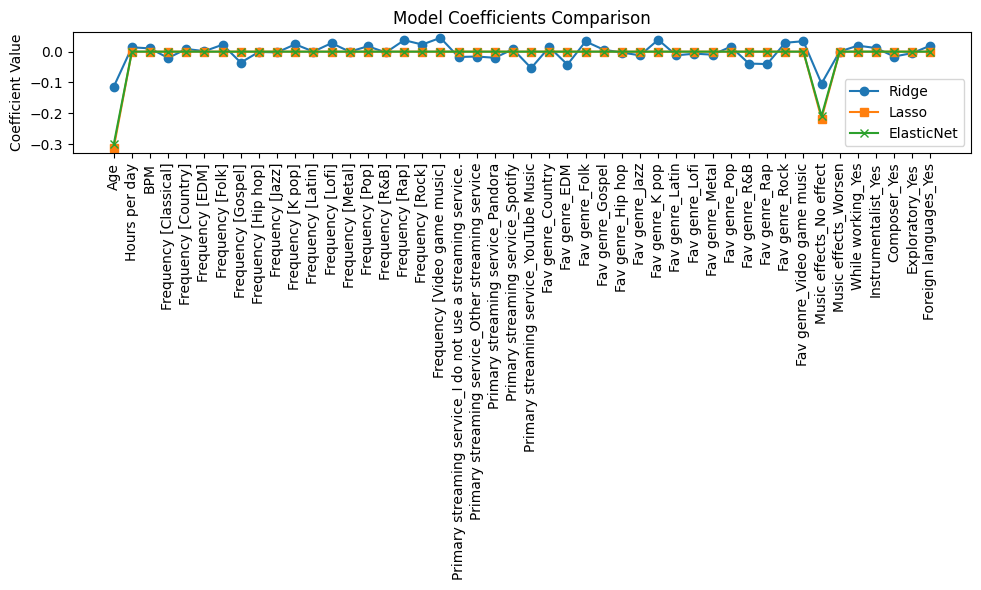

In [116]:
# Coefficient plots
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.plot(feature_names, best_ridge.named_steps['ridge'].coef_, 'o-', label='Ridge')
plt.plot(feature_names, best_lasso.named_steps['lasso'].coef_, 's-', label='Lasso')
plt.plot(feature_names, best_elastic.named_steps['elastic'].coef_, 'x-', label='ElasticNet')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Model Coefficients Comparison')
plt.legend()
plt.tight_layout()
plt.show()
